**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# Hierarchical Clustering Explained

This repository provides code examples demonstrating hierarchical clustering, a powerful unsupervised machine learning technique used for grouping similar data points into clusters. Unlike partitioning methods like K-means, hierarchical clustering builds a hierarchy of clusters, represented visually by a dendrogram.

## What is Hierarchical Clustering?

Hierarchical clustering organizes data into a tree-like structure of nested clusters. There are two main approaches:

*   **Agglomerative (Bottom-Up):** Starts with each data point as its own cluster and progressively merges the closest clusters until only one remains. This is the most common type.
*   **Divisive (Top-Down):** Begins with all data points in a single cluster and recursively splits it into smaller clusters.

## Key Concepts

*   **Dendrogram:** A tree diagram illustrating the hierarchy of clusters. The height of the branches represents the distance between clusters.
*   **Linkage Criteria:** Defines how the distance between clusters is calculated:
    *   **Single Linkage:** Uses the shortest distance between any two points in the clusters. Prone to chaining.
    *   **Complete Linkage:** Uses the longest distance between any two points in the clusters. Creates compact clusters.
    *   **Average Linkage:** Uses the average distance between all pairs of points in the clusters. A compromise between single and complete linkage.
    *   **Ward's Method:** Minimizes the variance within clusters. Tends to produce equally sized clusters.
*   **Distance Metric:** Determines how the distance between individual data points is measured (e.g., Euclidean distance, Manhattan distance).

## Determining the Number of Clusters

The dendrogram is crucial for deciding the final clusters. Several techniques can be used:

*   **Visual Inspection:** Look for the largest vertical gaps in the dendrogram. Imagine drawing a horizontal line across the dendrogram; the number of intersected vertical lines indicates the number of clusters at that level.
*   **Distance Threshold:** Set a maximum distance for merging clusters. Clusters merged above this threshold are considered separate.
*   **Combining with Other Methods:** Techniques like the elbow method (used in K-means) can sometimes be adapted to hierarchical clustering.
*   **Domain Knowledge:** Consider the context of your data. Does a certain number of clusters make sense based on your understanding of the data?

## Advantages of Hierarchical Clustering

*   Does not require specifying the number of clusters beforehand.
*   Provides a hierarchical structure, revealing relationships between clusters.
*   Versatile due to various linkage methods.

## Disadvantages of Hierarchical Clustering

*   Can be computationally expensive for large datasets.
*   Sensitive to noise and outliers (especially single linkage).
*   Merges are irreversible.

## When to Use Hierarchical Clustering

*   When the number of clusters is unknown.
*   When a hierarchical structure is desired.
*   For relatively small to medium-sized datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

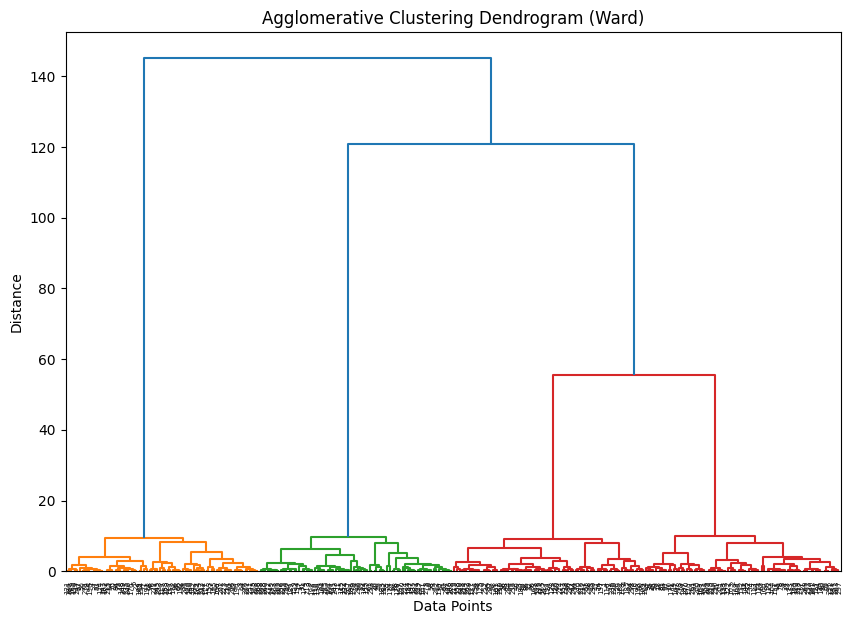

In [3]:
# 1. Agglomerative Clustering (with Dendrogram and Metrics)

# Calculate linkage matrix (Ward's method is often a good default)
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Agglomerative Clustering Dendrogram (Ward)')
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [36]:
# Determine number of clusters (e.g., from dendrogram visualization - let's say 3)
n_clusters_agg = 3

In [37]:
# Perform agglomerative clustering with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

In [38]:
# Calculate metrics
silhouette_avg_agg = silhouette_score(X, agg_labels)
print(silhouette_avg_agg)

0.7569108532473462


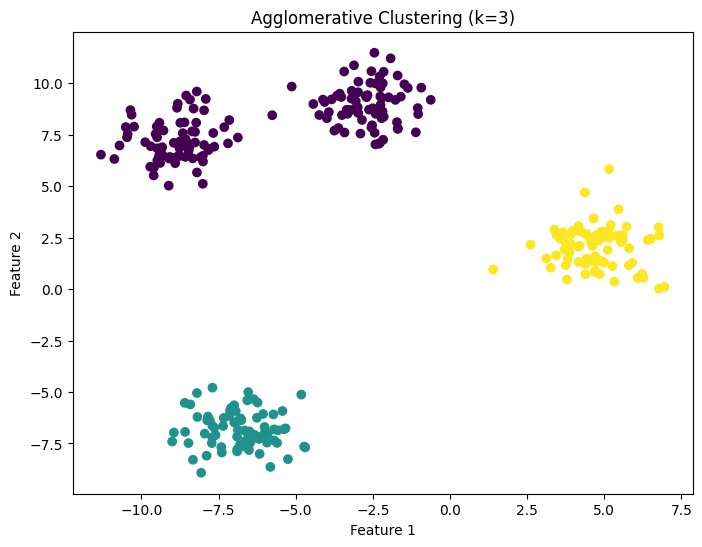

In [39]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering (k={n_clusters_agg})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

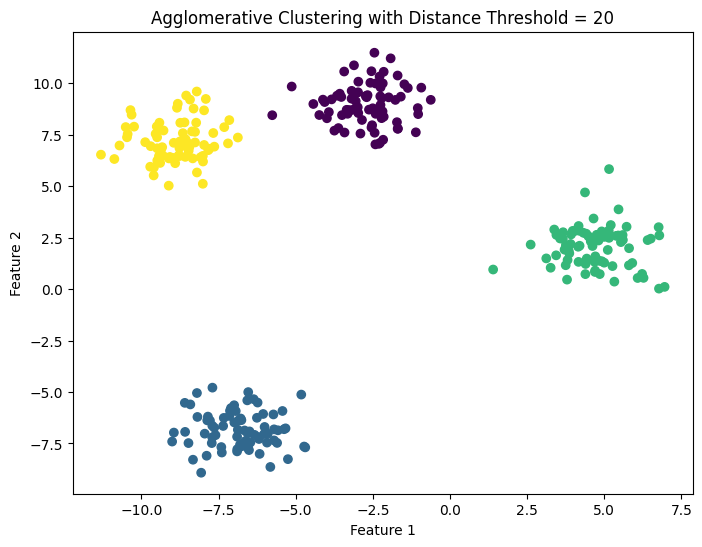

In [34]:
# 2. Agglomerative Clustering with Distance Threshold

# Perform agglomerative clustering with a distance threshold
# n_clusters must be None when using distance_threshold
distance_threshold = 20  # Adjust as needed based on dendrogram
agg_clustering_dist = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, linkage='ward')
agg_labels_dist = agg_clustering_dist.fit_predict(X)

# Plot the clusters from Distance Threshold
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels_dist, cmap='viridis')
plt.title(f'Agglomerative Clustering with Distance Threshold = {distance_threshold}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [35]:
# Print number of clusters found with distance threshold
n_clusters_dist = len(np.unique(agg_labels_dist))
print(f"Number of clusters found with distance threshold: {n_clusters_dist}")

Number of clusters found with distance threshold: 4


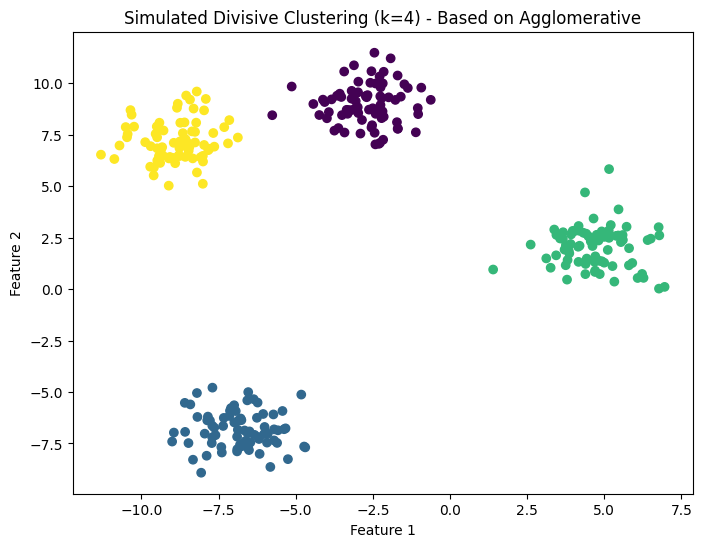

In [40]:
# 3. Divisive Clustering (Simplified Simulation)

'''Divisive clustering is not directly available in scikit-learn.
 We'll simulate a basic divisive approach for demonstration.
 In a real-world scenario, you would likely implement a recursive splitting algorithm.

 For simplicity, we'll use the agglomerative clustering results and reverse the process.
 This is NOT a true divisive algorithm but serves to illustrate the concept.'''

#Let's use the agglomerative result with 4 clusters as a starting point for our "divisive" simulation.
n_clusters_div = 4
agg_clustering_div = AgglomerativeClustering(n_clusters=n_clusters_div, linkage='ward')
agg_labels_div = agg_clustering_div.fit_predict(X)

#Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels_div, cmap='viridis')
plt.title(f'Simulated Divisive Clustering (k={n_clusters_div}) - Based on Agglomerative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Hierarchical Clustering with Distance Threshold

The output "Number of clusters found with distance threshold: 4" indicates that when you applied agglomerative hierarchical clustering with a specific distance threshold to your dataset, the algorithm identified four distinct clusters.

Here's a breakdown:

*   **Distance Threshold:** This is the maximum distance allowed between two clusters for them to be merged.

*   **Cluster Formation:** The algorithm starts by considering each data point as an individual cluster. It then iteratively merges the closest pair of clusters, continuing until the distance between the closest pair exceeds the specified threshold.

*   **Resulting Clusters:** In this case, the algorithm stopped merging clusters when the distances exceeded the threshold, resulting in four distinct groups of data points.

**Key Points:**

*   **Choosing the Threshold:** The choice of the distance threshold significantly influences the number of clusters. A higher threshold will result in fewer clusters, while a lower threshold will result in more clusters.

*   **Interpreting the Result:** The number of clusters found with a given threshold provides valuable information about the inherent structure of your data.

If you have the dendrogram visualization, you can visually inspect where the horizontal line corresponding to your distance threshold intersects the dendrogram to understand the cluster formation more clearly.


**we need choose the correct no of cluters where within cluster distance is less and distance between clusters are high , do not completely dependent on metrics.**